In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from src.utils import fetch_data_from_db_table

In [9]:
# load the clean data
df = fetch_data_from_db_table('clean_data')

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only the columns with experience metrics
experience_metrics = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
df_experience = df[experience_metrics]

# Handle missing values if any
df_experience = df_experience.dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_experience)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)

# Add the cluster labels to the original DataFrame
df_experience['cluster'] = kmeans.labels_

# Print the number of users in each cluster
print(df_experience['cluster'].value_counts())

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_experience.columns[:-1])
print(cluster_centers_df)

cluster
0    85085
1    33818
2    31098
Name: count, dtype: int64
   Dur. (ms)  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0   0.371973        -0.337561        -0.458213                -0.797263   
1  -0.917706        -0.123178        -0.045572                 0.907334   
2  -0.020109         1.060203         1.306569                 1.198006   

   Avg Bearer TP UL (kbps)  
0                -0.737217  
1                 0.750342  
2                 1.204405  


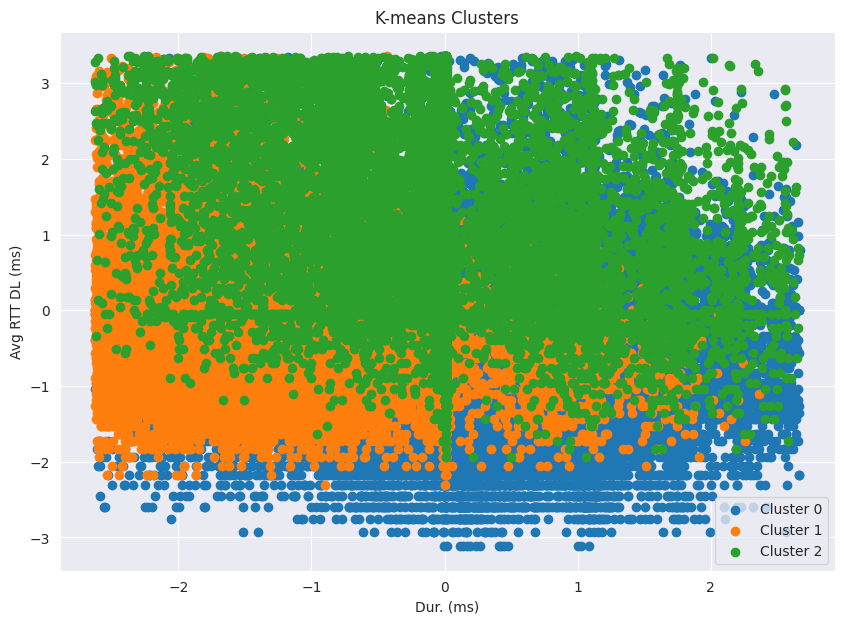

In [12]:
import matplotlib.pyplot as plt

# Choose two features to plot
feature1 = 'Dur. (ms)'
feature2 = 'Avg RTT DL (ms)'

plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for cluster in df_experience['cluster'].unique():
    plt.scatter(df_experience[df_experience['cluster'] == cluster][feature1], 
                df_experience[df_experience['cluster'] == cluster][feature2], 
                label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.title('K-means Clusters')
plt.show()